In [102]:
from src.data_container import DataContainer
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import src.emnist_utils as utils
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
dc = DataContainer()

In [3]:
dc.load_emnist()

In [4]:
arr = np.zeros([3, 4])

In [5]:
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
arr[0, 0] = 1

In [7]:
arr

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

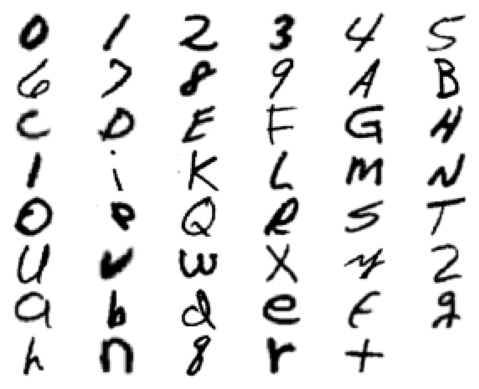

In [8]:
dc.plot_all_chars()

In [9]:
knn_clf = KNeighborsClassifier()

In [10]:
knn_clf.fit(dc.X_train, dc.y_train)

KNeighborsClassifier()

In [11]:
knn_clf.score(dc.X_test, dc.y_test)

0.7846276595744681

In [12]:
knn_clf.score(dc.X_train, dc.y_train)

0.8500177304964539

In [13]:
rf_clf = RandomForestClassifier(n_jobs=4)

In [14]:
knn_pred = knn_clf.predict(dc.X_test)

In [15]:
knn_pred

array([41, 39,  9, ...,  1, 26, 33], dtype=uint8)

In [16]:
dc.map_label_to_char(knn_pred)

array(['g', 'e', '9', ..., '1', 'Q', 'X'], dtype='<U1')

In [17]:
res_df = pd.DataFrame({'knn_pred': knn_pred, 'target': dc.y_test,
                       'pred_chars': dc.map_label_to_char(knn_pred),'target_chars': dc.map_label_to_char(dc.y_test)})

In [18]:
res_df

,knn_pred,target,pred_chars,target_chars
0,41,41,g,g
1,39,39,e,e
2,9,9,9,9
3,26,26,Q,Q
4,44,44,q,q
...,...,...,...,...
18795,45,45,r,r
18796,15,15,F,F
18797,1,1,1,1
18798,26,26,Q,Q


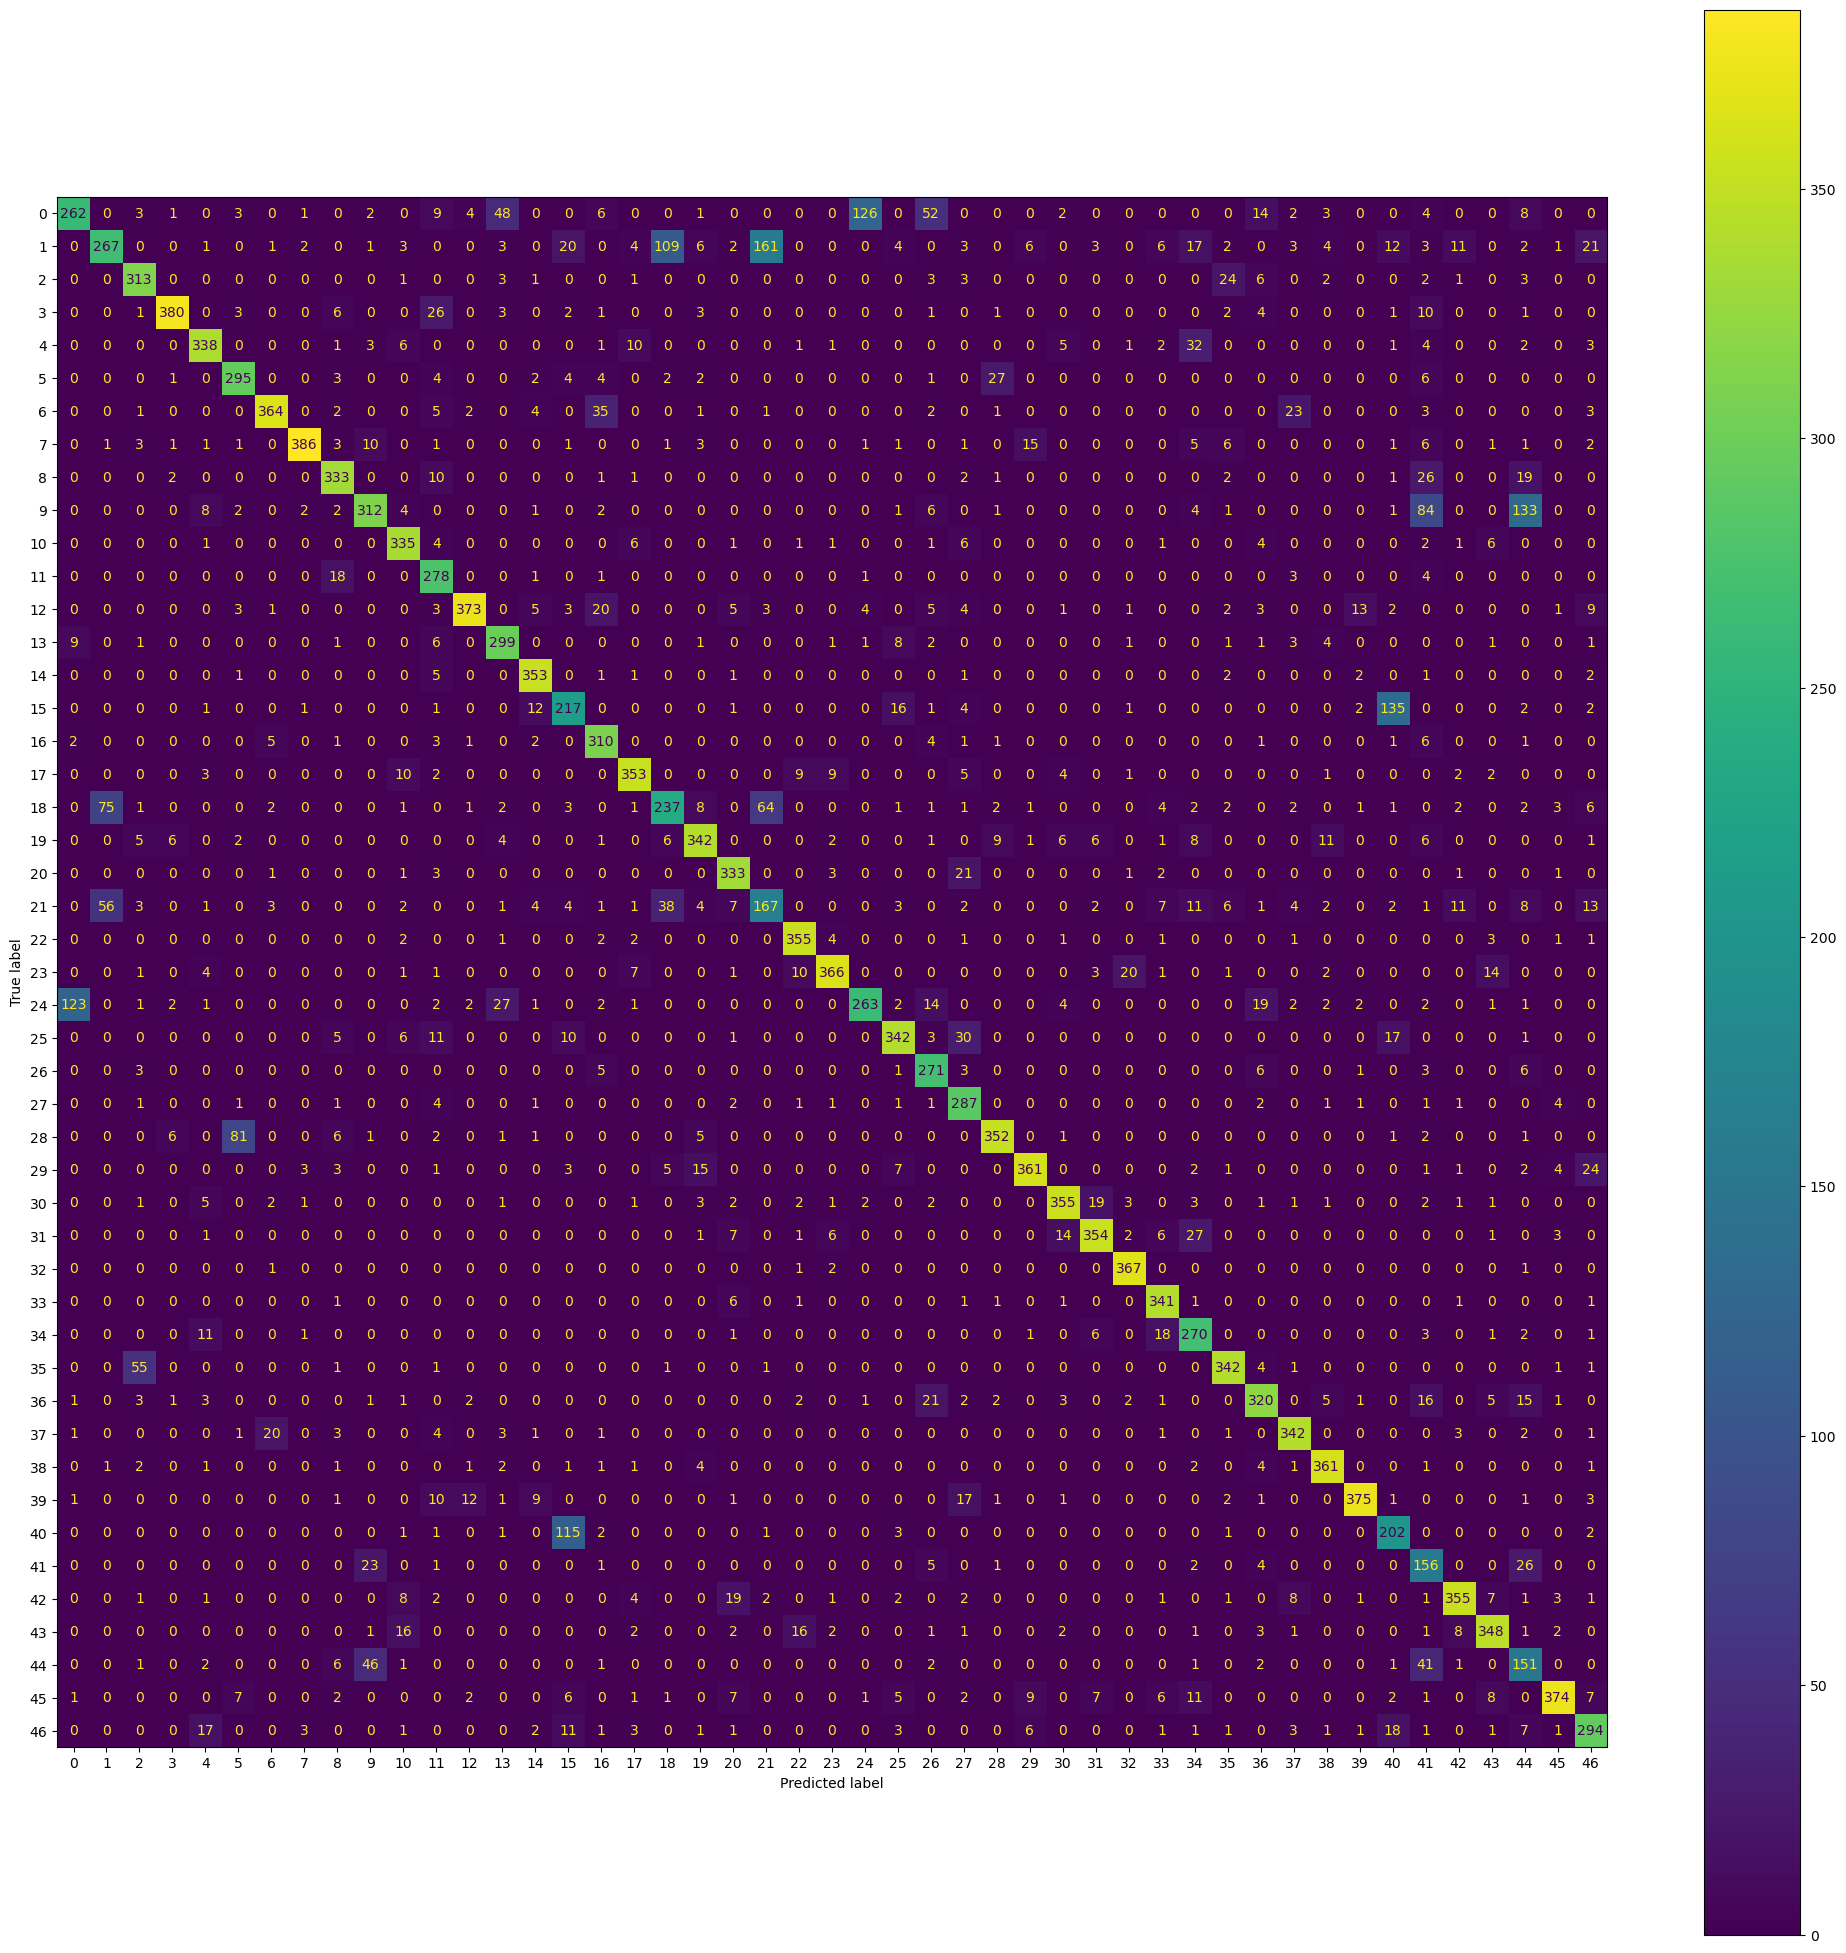

In [19]:
fig, ax = plt.subplots(figsize=(25, 25))
ConfusionMatrixDisplay.from_predictions(res_df['knn_pred'], res_df['target'], ax=ax)
plt.show()

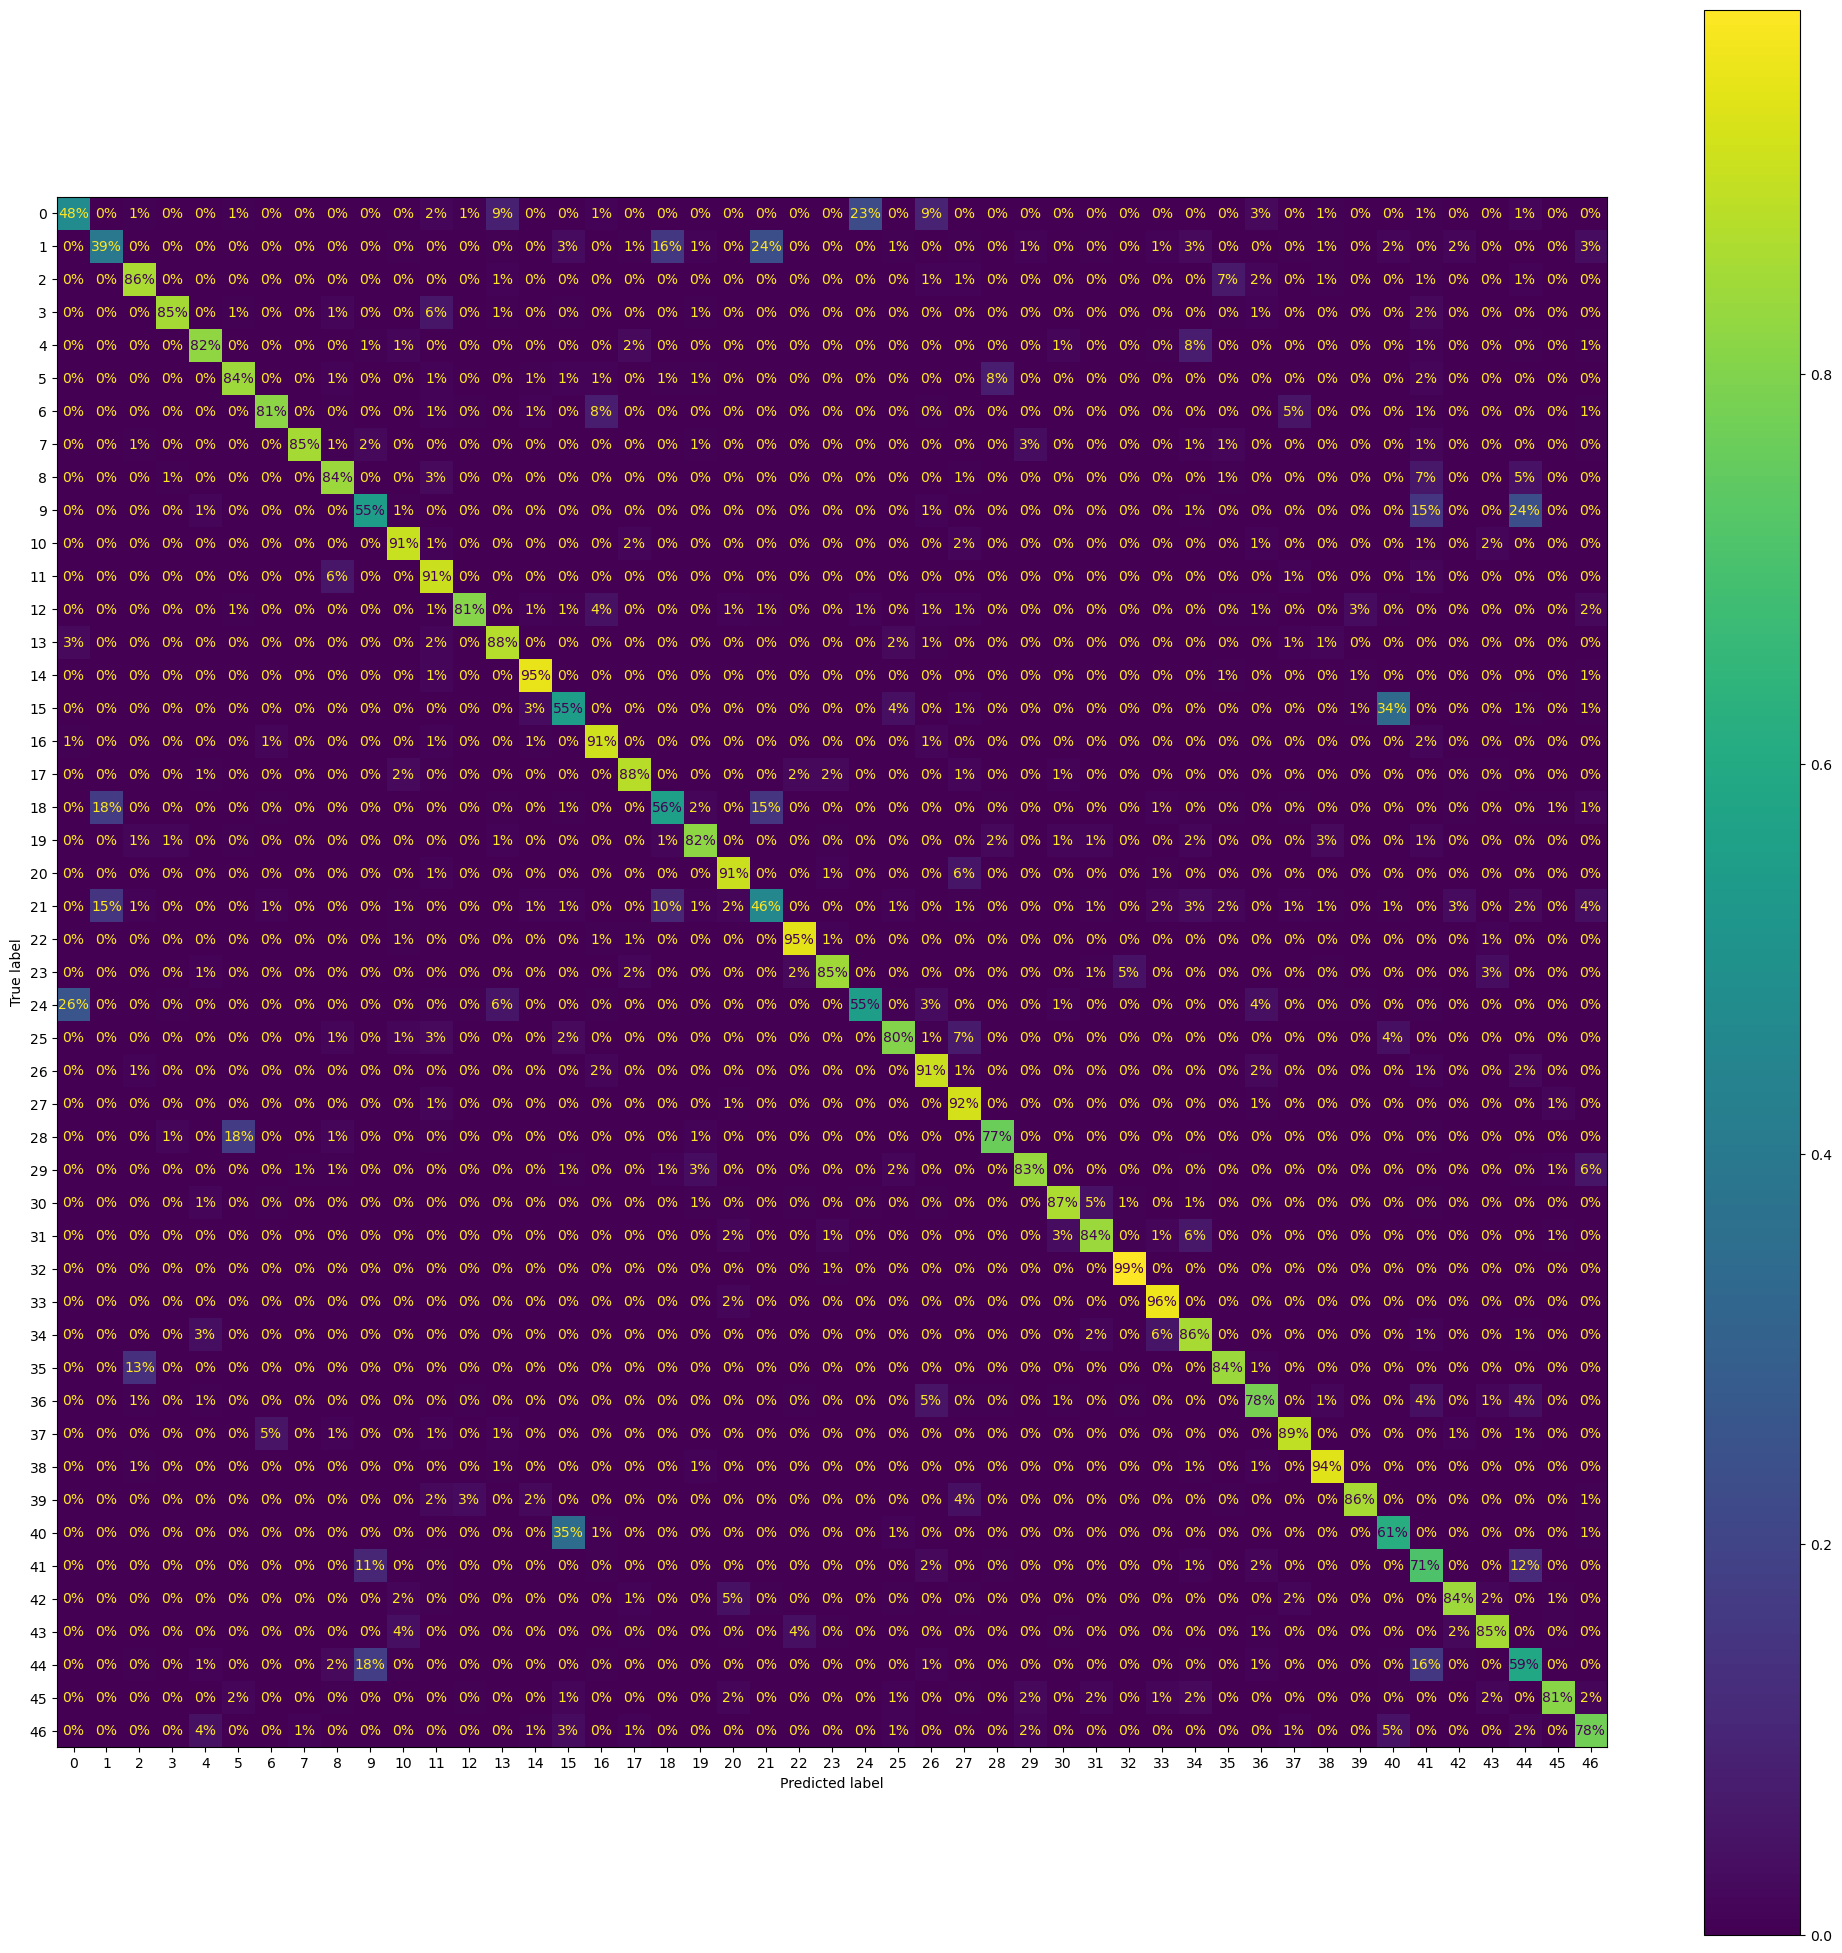

In [20]:
fig, ax = plt.subplots(figsize=(25, 25))
ConfusionMatrixDisplay.from_predictions(res_df['knn_pred'], res_df['target'], normalize='true', values_format=".0%" , ax=ax)
plt.show()

Saving figure row_nomalized_confusion_matrix


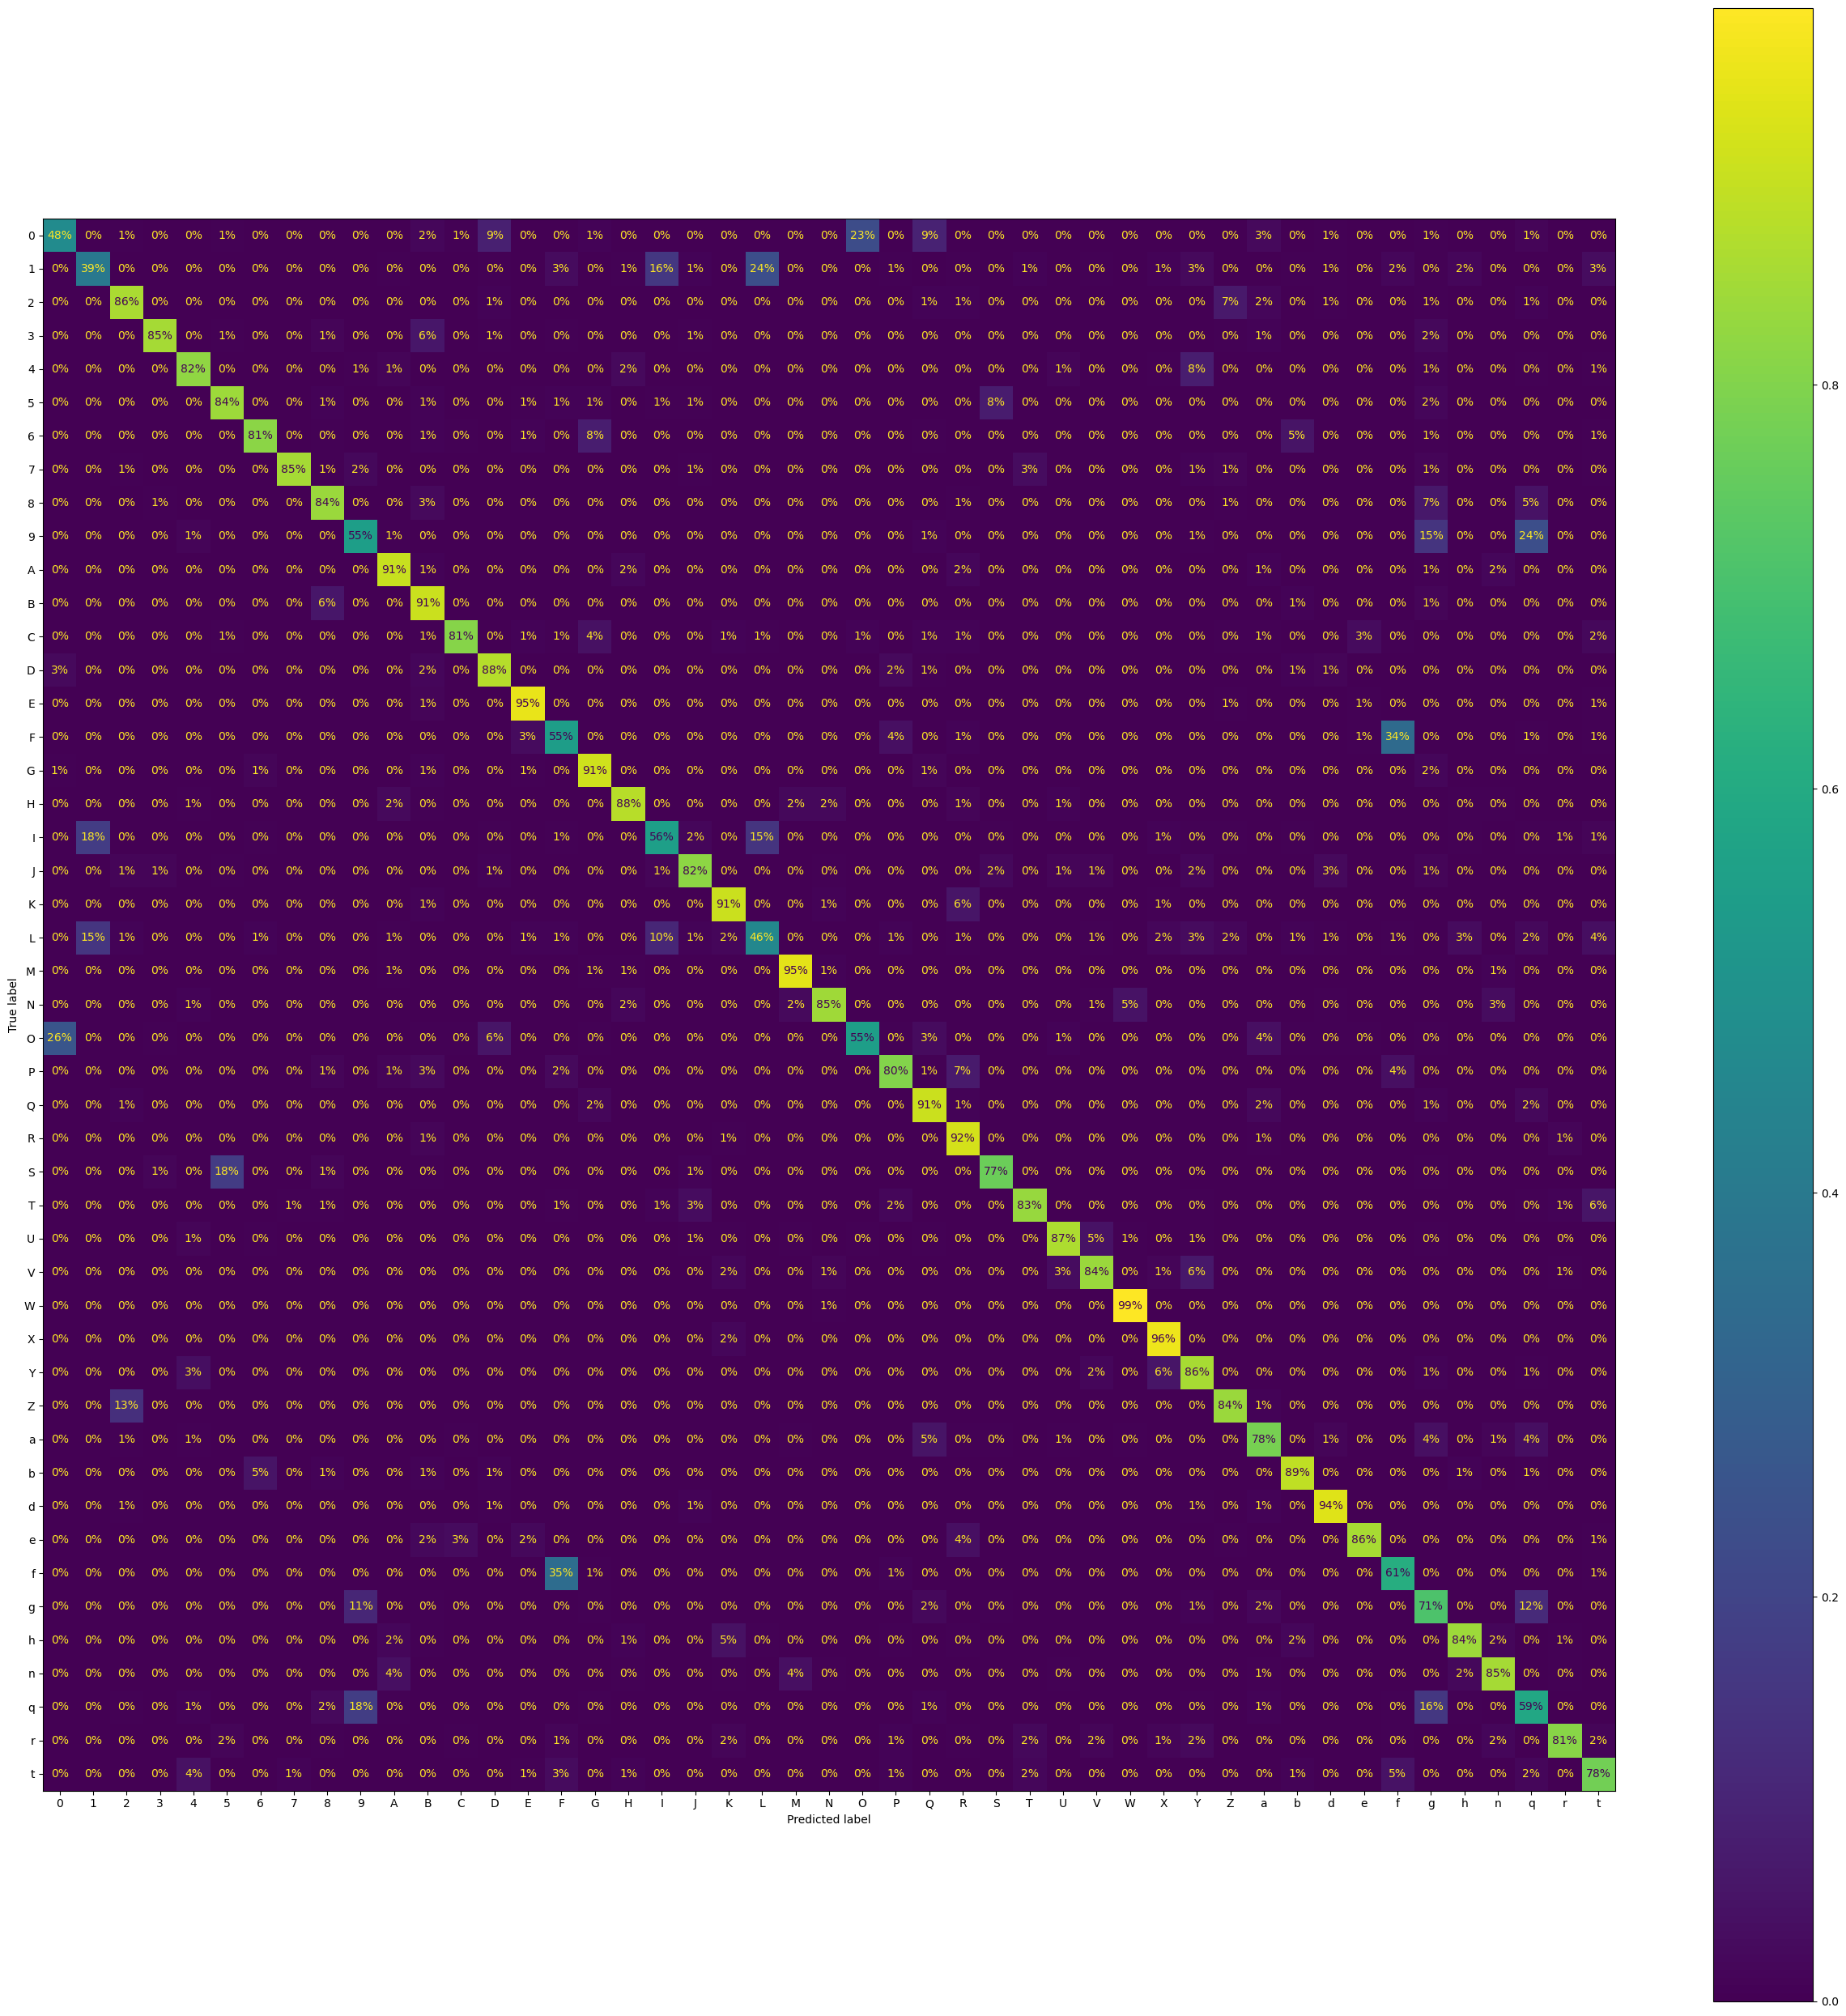

In [23]:
fig, ax = plt.subplots(figsize=(25, 25))
ConfusionMatrixDisplay.from_predictions(res_df['knn_pred'], res_df['target'], normalize='true', values_format=".0%" , ax=ax, display_labels=dc.map_label_to_char(dc.mapping.keys()))

utils.save_fig("row_nomalized_confusion_matrix", resolution=450)
plt.show()

In [27]:
chars = dc.map_label_to_char(dc.mapping.keys())
chars

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd',
       'e', 'f', 'g', 'h', 'n', 'q', 'r', 't'], dtype='<U1')

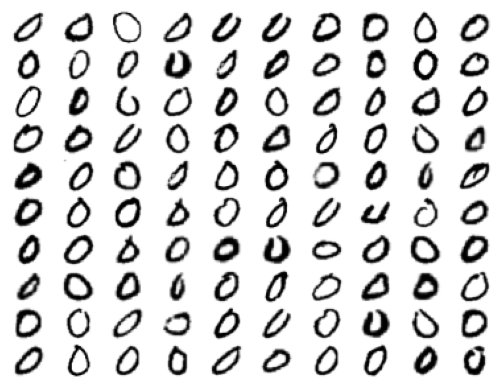

In [25]:
dc.plot_character('0', 100)

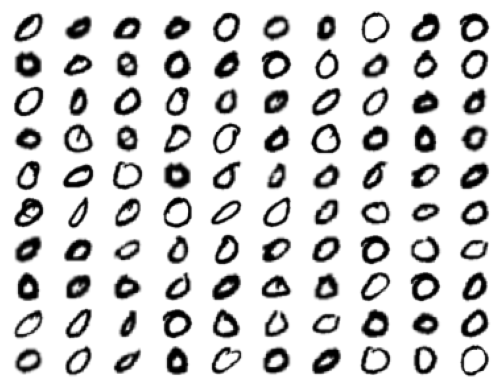

In [28]:
dc.plot_character('O', 100)

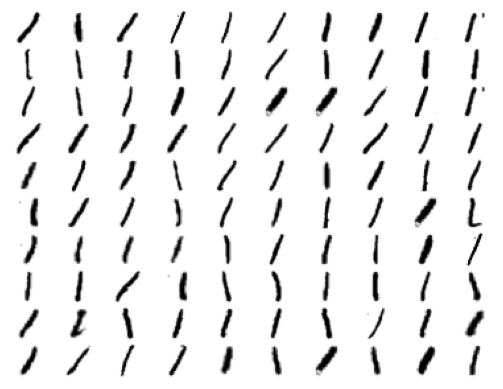

In [29]:
dc.plot_character('1', 100)

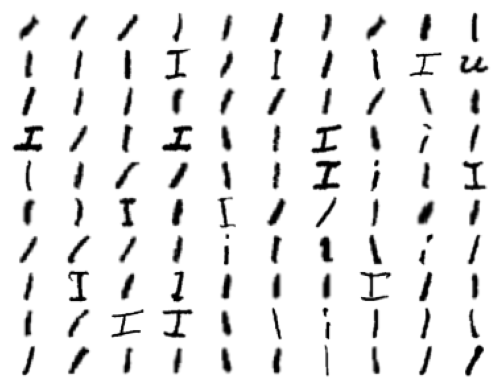

In [30]:
dc.plot_character('I', 100)

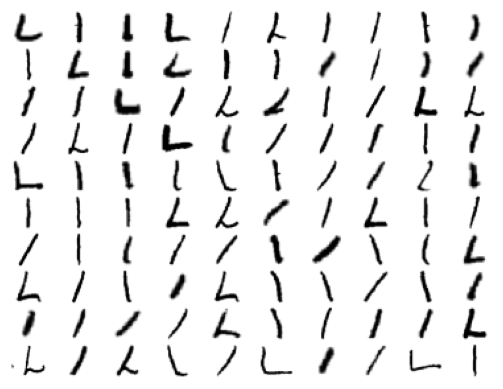

In [32]:
dc.plot_character('L', 100)

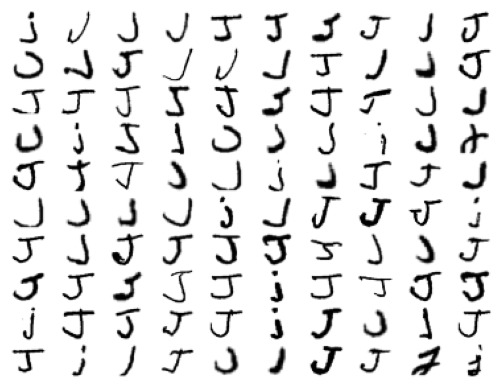

In [33]:
dc.plot_character('J', 100)

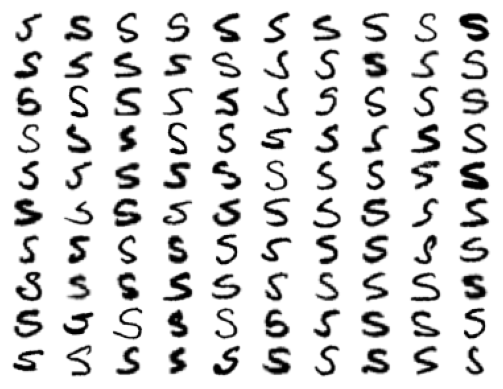

In [34]:
dc.plot_character('S', 100)

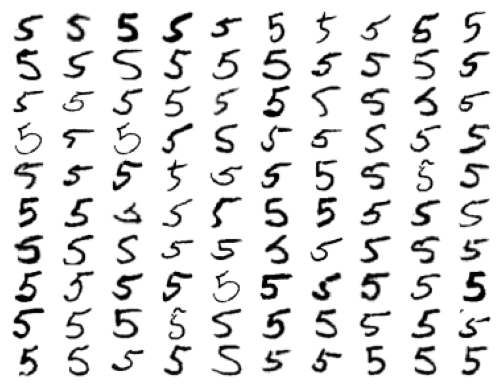

In [35]:
dc.plot_character('5', 100)

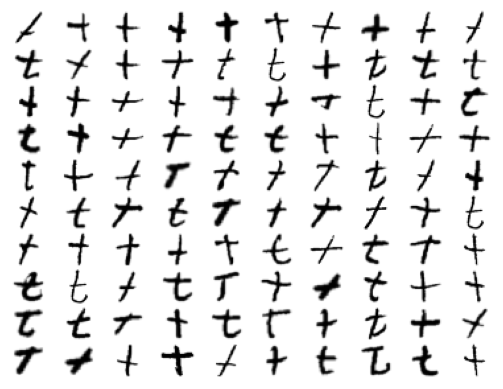

In [36]:
dc.plot_character('t', 100)

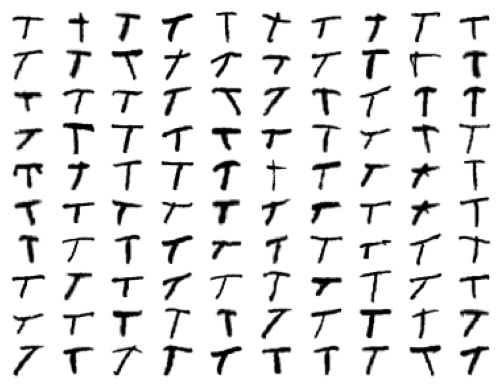

In [38]:
dc.plot_character('T', 100)

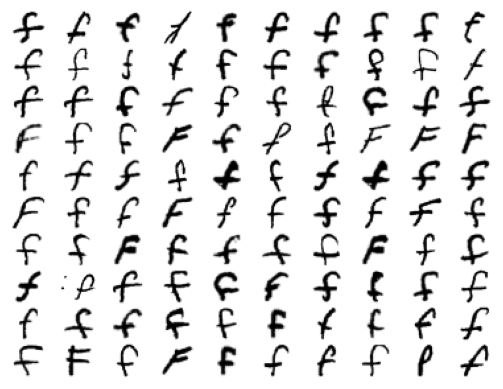

In [39]:
dc.plot_character('f', 100)

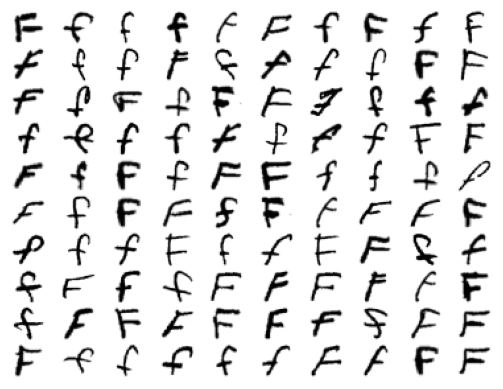

In [40]:
dc.plot_character('F', 100)

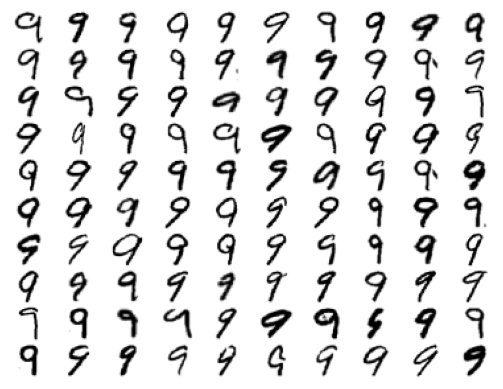

In [41]:
dc.plot_character('9', 100)

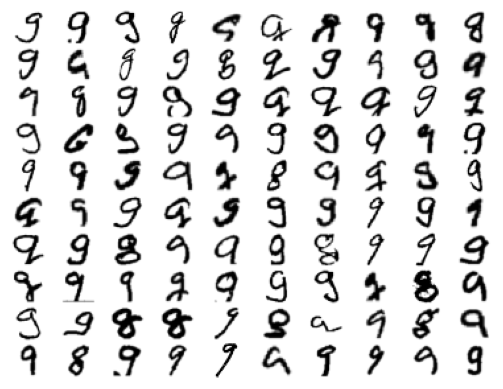

In [42]:
dc.plot_character('g', 100)

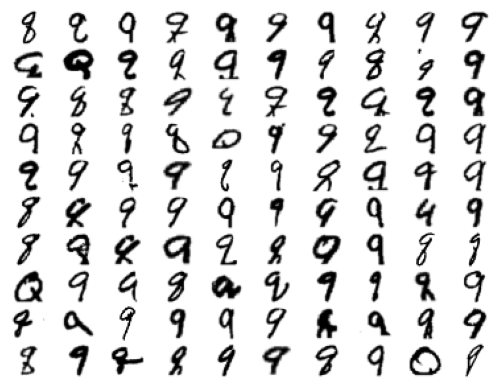

In [43]:
dc.plot_character('q', 100)

In [44]:
pred_prob = knn_clf.predict_proba(dc.X_test)

In [46]:
pred_prob[:10]

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [47]:
knn_clf.predict(dc.X_test[:10])

array([41, 39,  9, 26, 44, 33, 14, 27,  3, 12], dtype=uint8)

In [48]:
knn_clf.score(dc.X_test, dc.y_test)

0.7846276595744681

In [86]:
one_hot_encoder = OneHotEncoder()

In [87]:
y_encoded = one_hot_encoder.fit_transform(dc.y_train.reshape(-1, 1))

In [88]:
y_encoded = y_encoded.toarray()

In [89]:
y_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
knn_encoded_clf = KNeighborsClassifier()

In [91]:
knn_encoded_clf.fit(dc.X_train, y_encoded)

KNeighborsClassifier()

In [92]:
knn_encoded_clf.score(dc.X_test, one_hot_encoder.transform(dc.y_test.reshape(-1, 1)).toarray())

0.7491489361702127

In [93]:
predicts = knn_encoded_clf.predict(dc.X_test)

In [94]:
pred_result = np.argmax(predicts, axis=1)

In [95]:
pred_result

array([41, 39,  9, ...,  1, 26, 33])

Saving figure encoded_confusion_matrix


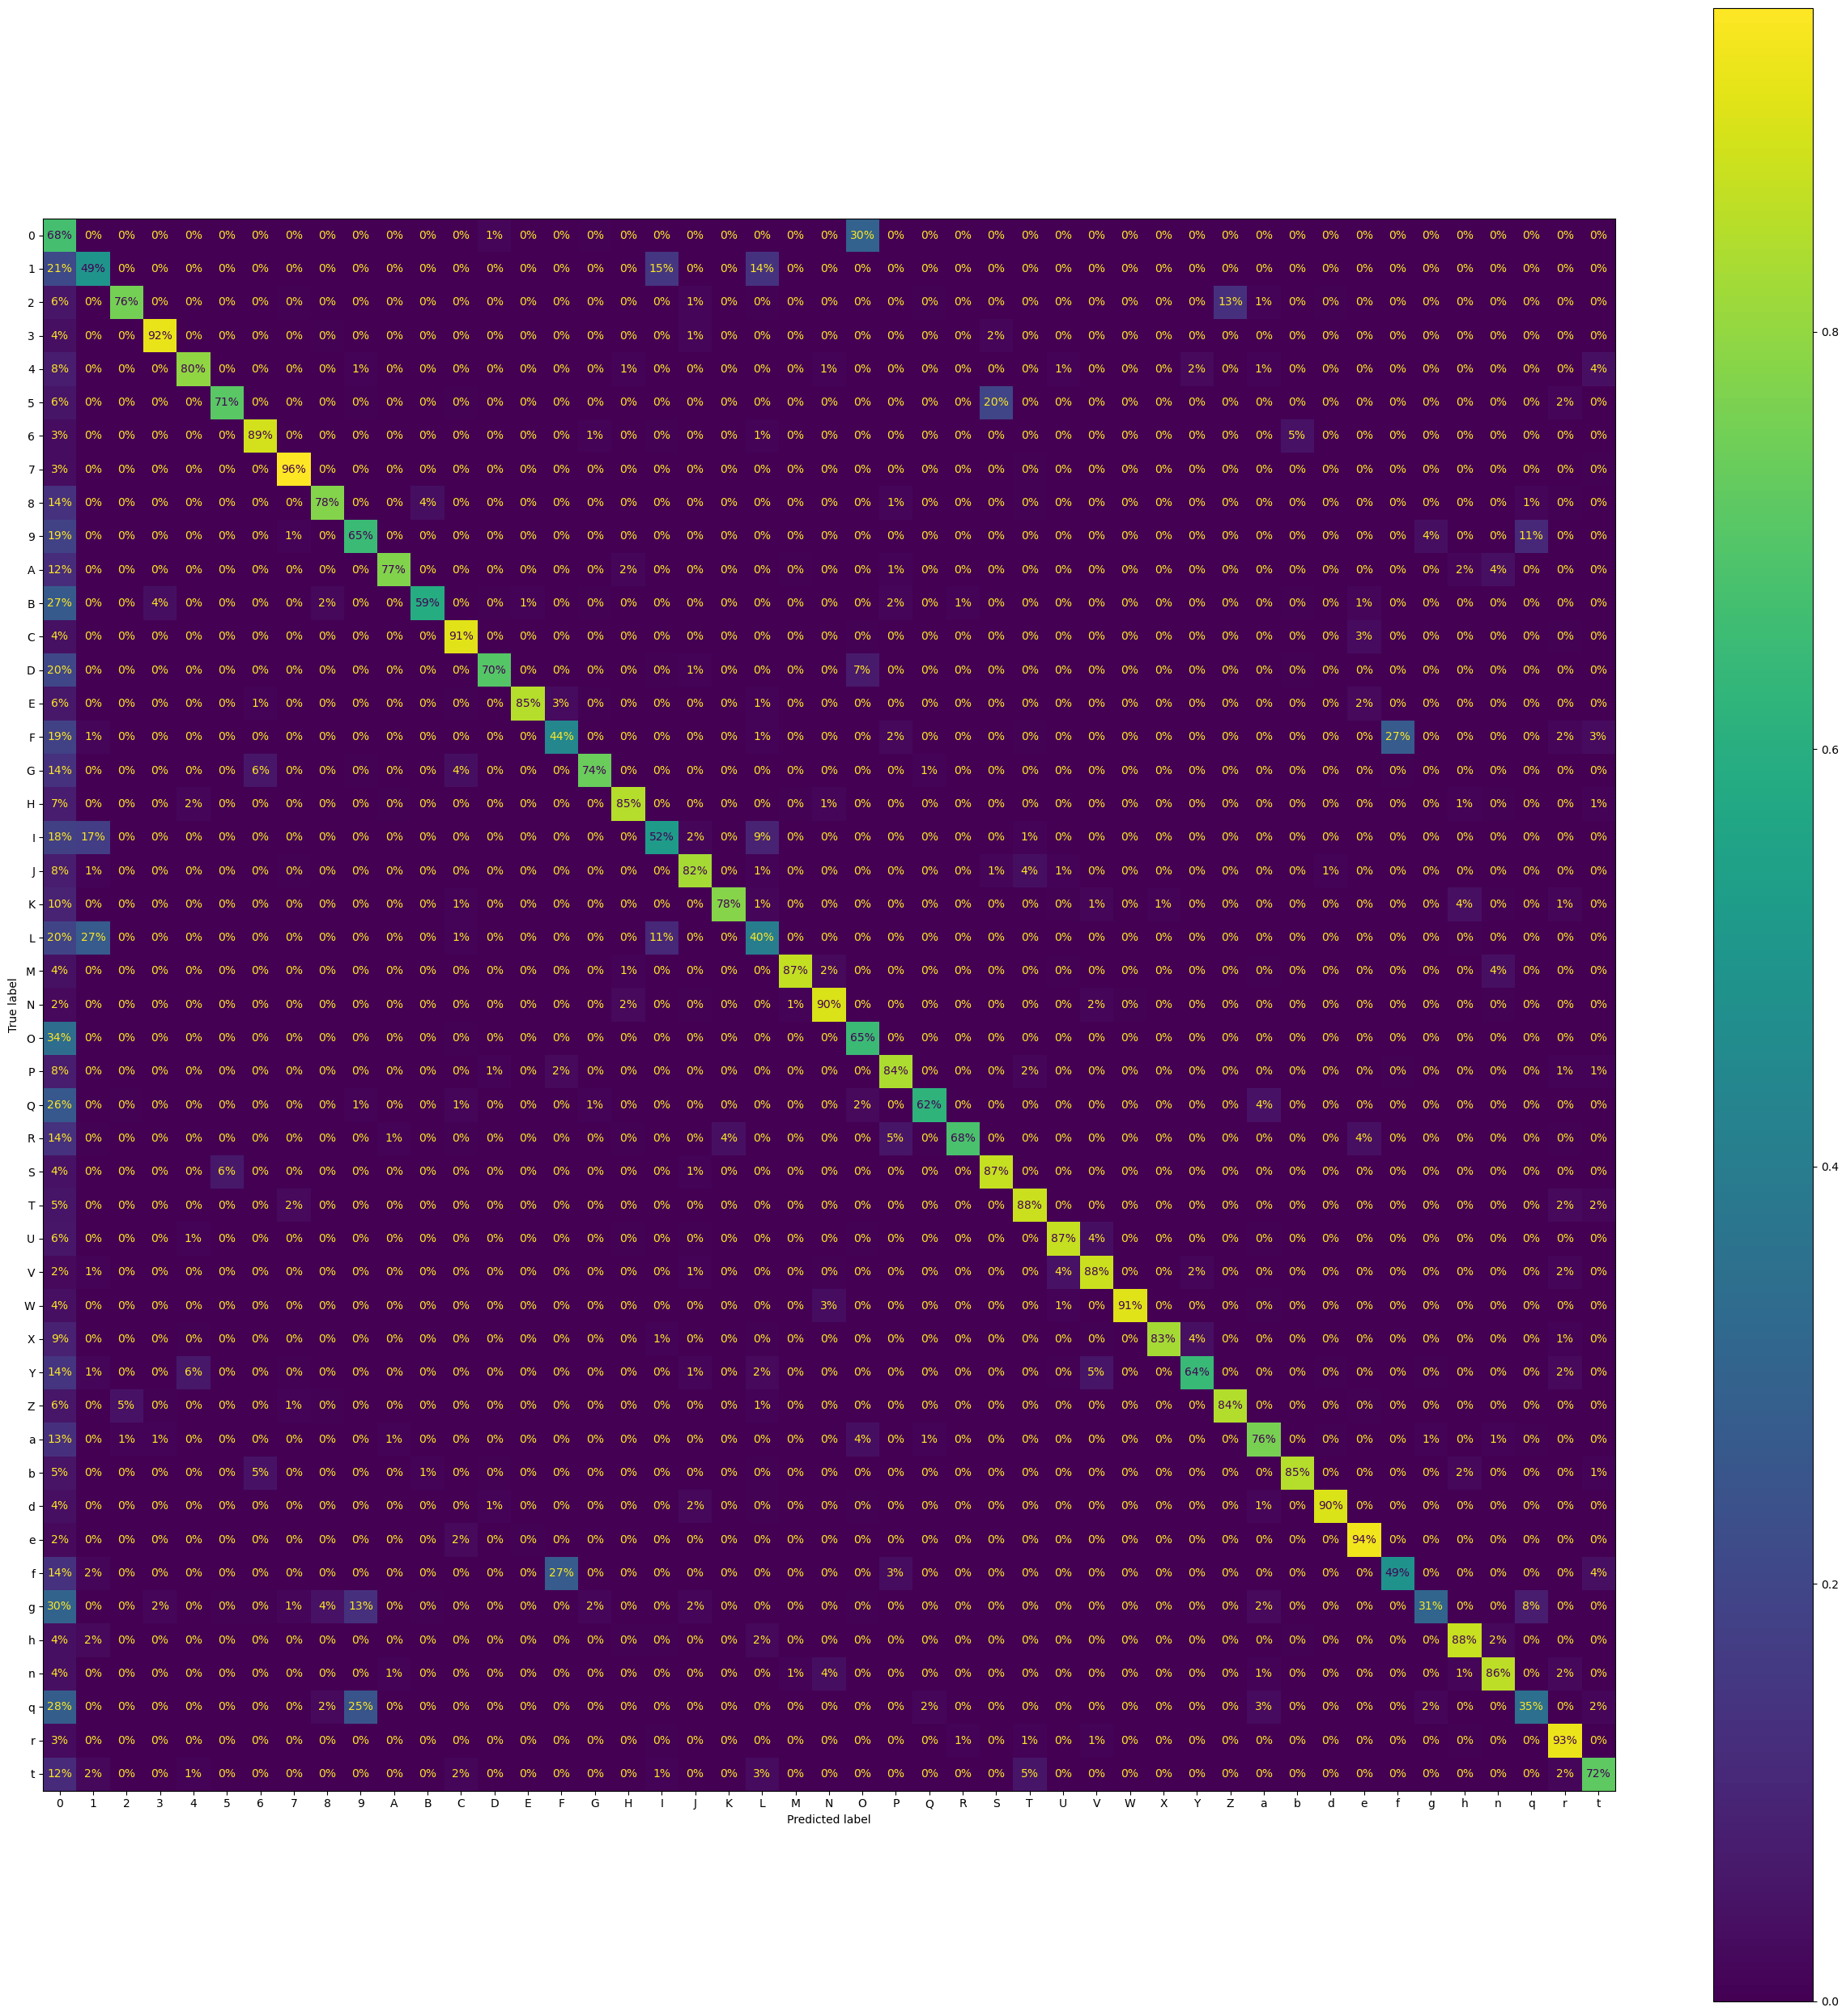

In [100]:
fig, ax = plt.subplots(figsize=(25, 25))
ConfusionMatrixDisplay.from_predictions(dc.y_test, pred_result, normalize='true', values_format=".0%" , ax=ax, display_labels=dc.map_label_to_char(dc.mapping.keys()))
utils.save_fig("encoded_confusion_matrix", resolution=450)
plt.show()

In [72]:
dc.y_test.shape

(18800,)

In [73]:
pred_result.shape

(10,)

In [80]:
np.sum(dc.y_test == pred_result)

14110

In [81]:
knn_encoded_clf.fit(dc.X_train, y_encoded)

KNeighborsClassifier()

In [82]:
knn_encoded_clf.score(dc.X_test, one_hot_encoder.transform(dc.y_test.reshape(-1, 1)).toarray())

0.7491489361702127

In [83]:
knn_clf.fit(dc.X_train, dc.y_train)

KNeighborsClassifier()

In [84]:
knn_clf.score(dc.X_test, dc.y_test)

0.7846276595744681

In [101]:
y_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
param_grid = {
    'n_neighbors': [5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    #'leaf_size': [20, 30, 40],
}

grid_search = GridSearchCV(cv=5, estimator=KNeighborsClassifier(), param_grid=param_grid, n_jobs=4)

In [110]:
grid_search.fit(dc.X_train[0:10000], y_encoded[0:10000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [111]:
grid_search.best_score_

0.5788

In [112]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}

In [113]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [114]:
bess_knn_clf = grid_search.best_estimator_

In [115]:
bess_knn_clf.score(dc.X_test, one_hot_encoder.transform(dc.y_test.reshape(-1, 1)).toarray())

0.5956914893617021

In [116]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['distance'],
    'algorithm': ['ball_tree'],
    'leaf_size': [20, 30, 40],
}

grid_search = GridSearchCV(cv=5, estimator=KNeighborsClassifier(), param_grid=param_grid, n_jobs=4)

In [117]:
grid_search.fit(dc.X_train[0:20000], y_encoded[0:20000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9], 'weights': ['distance']})

In [118]:
grid_search.best_score_

0.6627500000000001

In [119]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 3,
 'weights': 'distance'}

In [124]:
param_grid = {
    'n_neighbors': [1, 3, 5],
    'weights': ['distance'],
    'algorithm': ['ball_tree'],
}

grid_search = GridSearchCV(cv=5, estimator=KNeighborsClassifier(), param_grid=param_grid, n_jobs=5)

In [125]:
grid_search.fit(dc.X_train, y_encoded)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'algorithm': ['ball_tree'], 'n_neighbors': [1, 3, 5],
                         'weights': ['distance']})

In [126]:
grid_search.best_score_

0.7650531914893617

In [127]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'distance'}

In [128]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, weights='distance')

In [ ]:
best_knn_clf = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, weights='distance', n_jobs=4)

In [130]:
best_knn_clf.fit(dc.X_train, y_encoded)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, weights='distance')

In [ ]:
best_knn_clf.score(dc.X_train, y_encoded)